In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 1. Data Loading and Initial Exploration
# Load the dataset and perform initial descriptive analysis to understand its structure and contents.

In [ ]:
# Load the dataset
try:
    file_path = 'healthcare-dataset-stroke-data (2).csv'
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Dataset file not found.")
    raise

# Display the first few rows
print("First few rows of the dataset:")
print(data.head())

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe(include='all'))

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

Dataset loaded successfully.
First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       

# 2. Data Exploration and Visualization
# Visualize distributions, correlations, and reduced dimensions to understand the data before preprocessing.

In [ ]:
# Create a copy of the dataset for visualization to preserve original categorical columns
data_viz = data.copy()

# Replace 'N/A' with NaN in 'bmi' for visualization
data_viz['bmi'] = data_viz['bmi'].replace('N/A', np.nan).astype(float)

# Impute missing 'bmi' with median for visualization
data_viz['bmi'] = data_viz['bmi'].fillna(data_viz['bmi'].median())


# 2.1. Feature Distributions

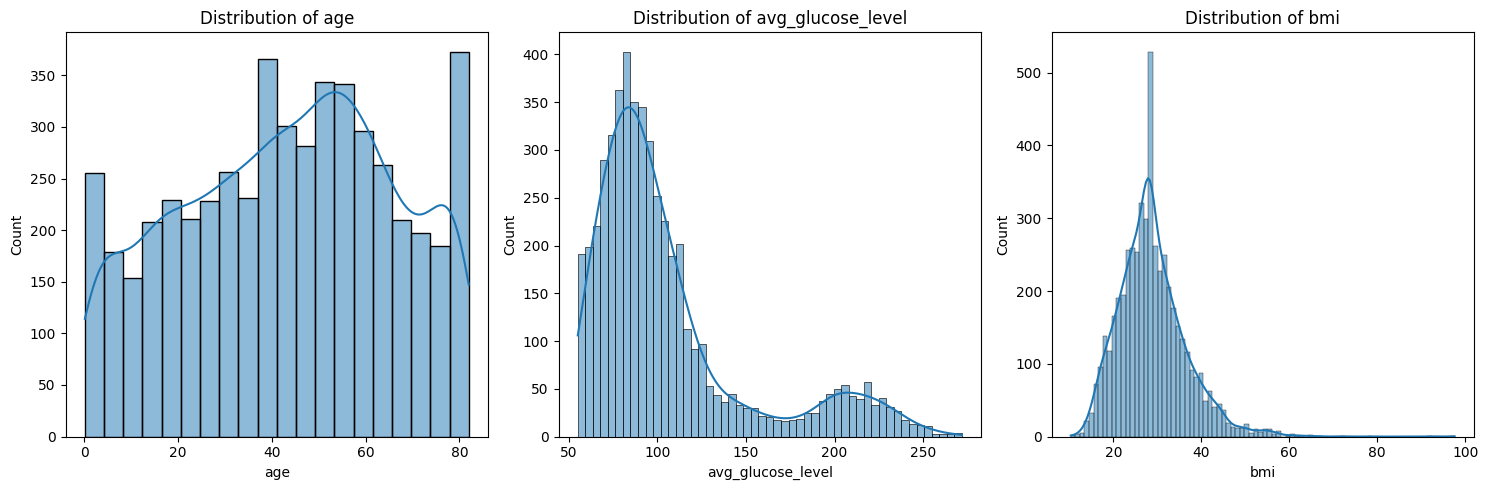

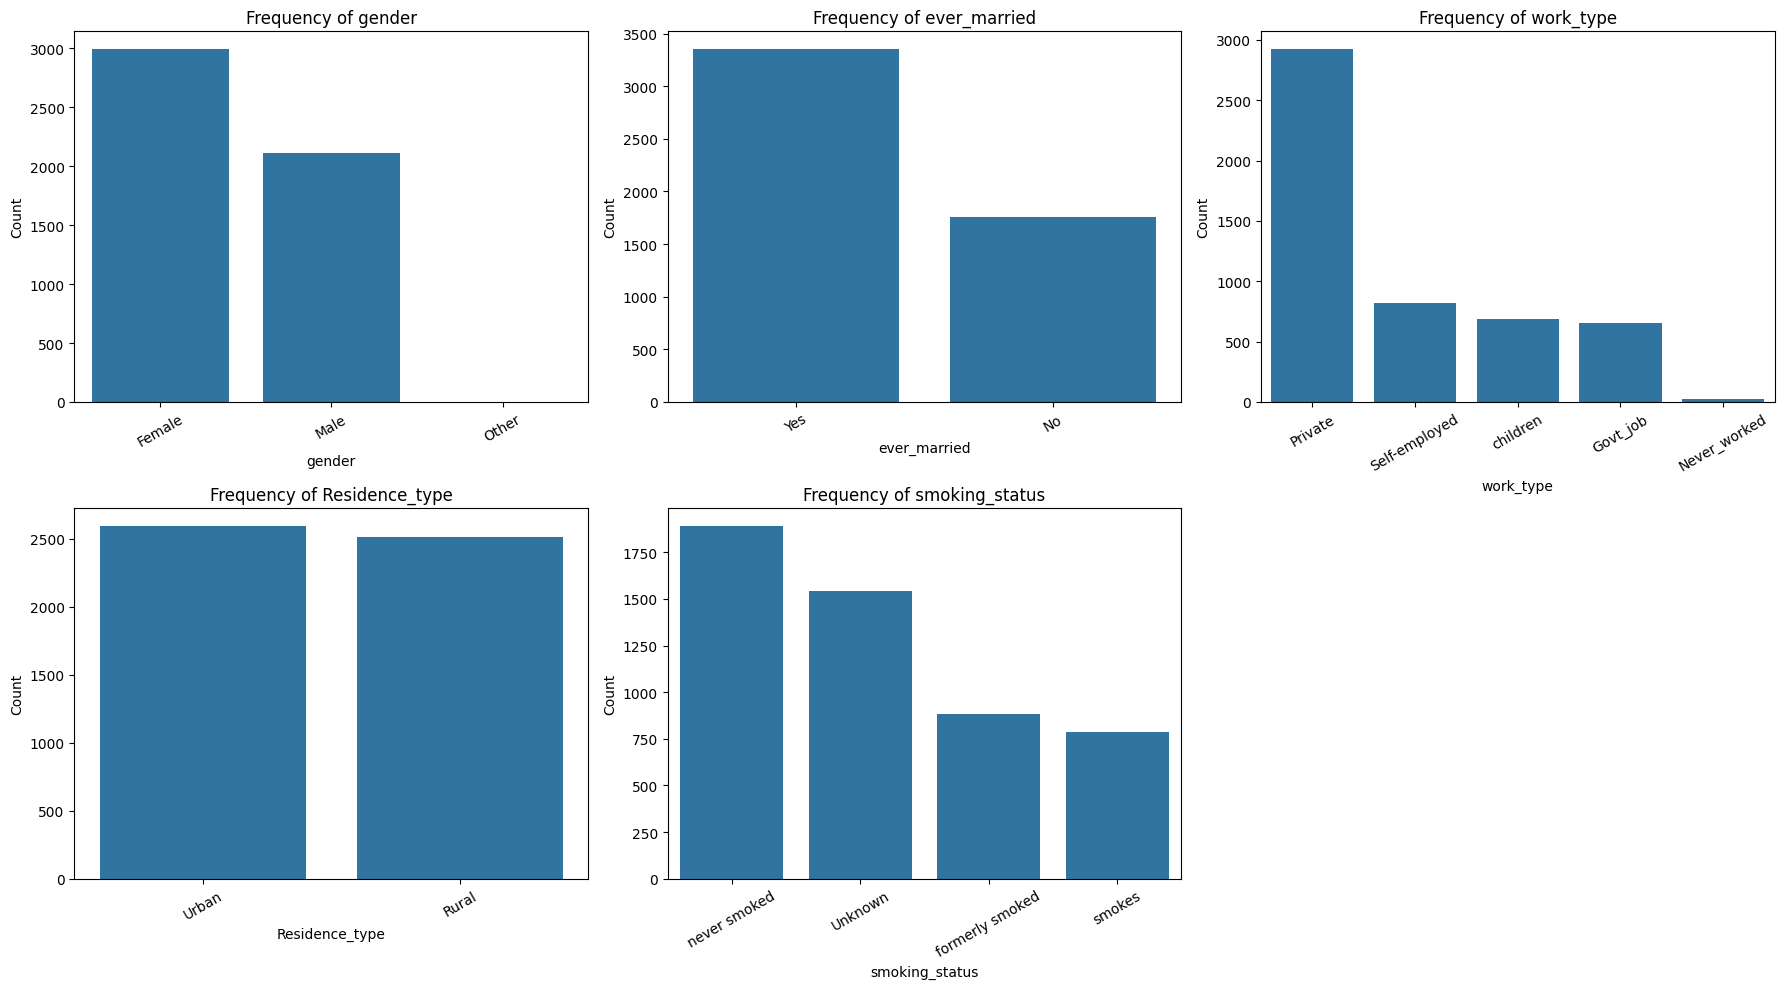

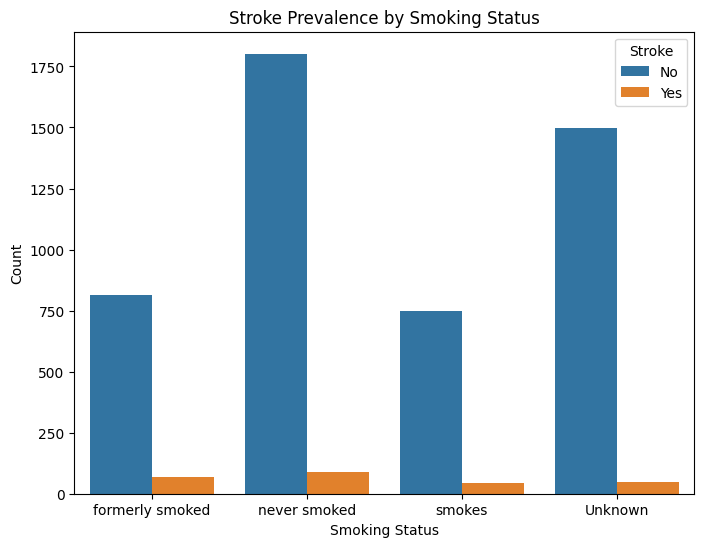

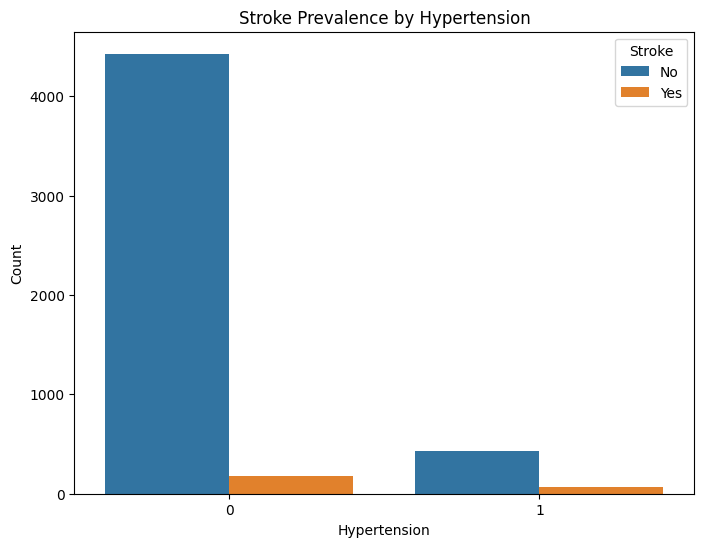

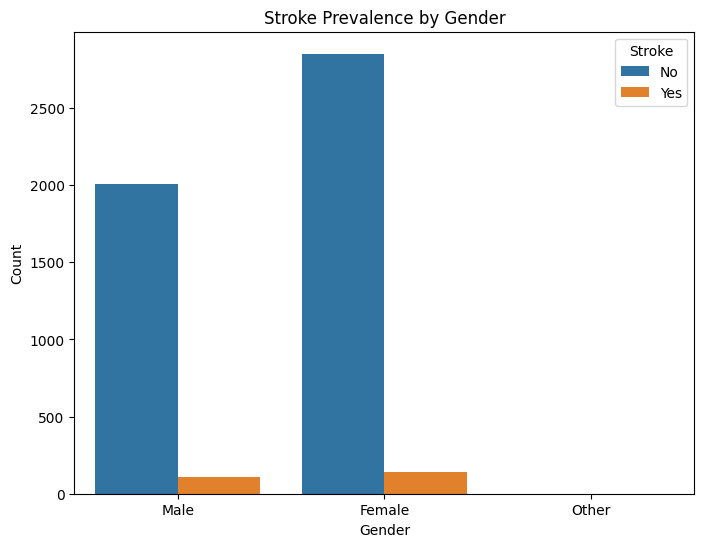

In [ ]:
# Plot histograms for numerical features and bar plots for categorical features.
plt.figure(figsize=(15, 5))
for i, col in enumerate(['age', 'avg_glucose_level', 'bmi']):
    plt.subplot(1, 3, i+1)
    sns.histplot(data_viz[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Define categorical columns to plot
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set up the plotting area
plt.figure(figsize=(18, 10))

# Loop through and plot each categorical feature
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)  # 2 rows x 3 cols grid
    sns.countplot(data=data_viz, x=col, order=data_viz[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)  # Rotate labels if needed

plt.tight_layout()
plt.show()

# Bar plot for stroke prevalence by smoking status
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', hue='stroke', data=data_viz)
plt.title('Stroke Prevalence by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

# Bar plot for stroke prevalence by hypertension
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='stroke', data=data_viz)
plt.title('Stroke Prevalence by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

# Stroke prevalence by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='stroke', data=data_viz)
plt.title('Stroke Prevalence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

# 2.2. Correlation Analysis

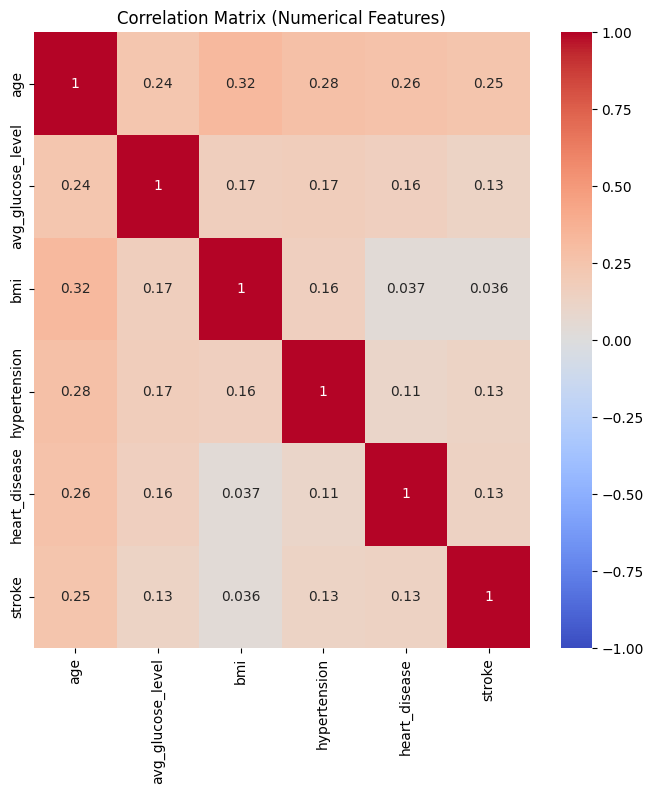

In [ ]:
# Visualize correlations among numerical features.

# Compute correlation matrix
corr_matrix = data_viz[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']].corr()

# Create mask to hide weak correlations (< 0.1 absolute value)
mask = np.abs(corr_matrix) < 0.01

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

#  2.3. Scatter Plots

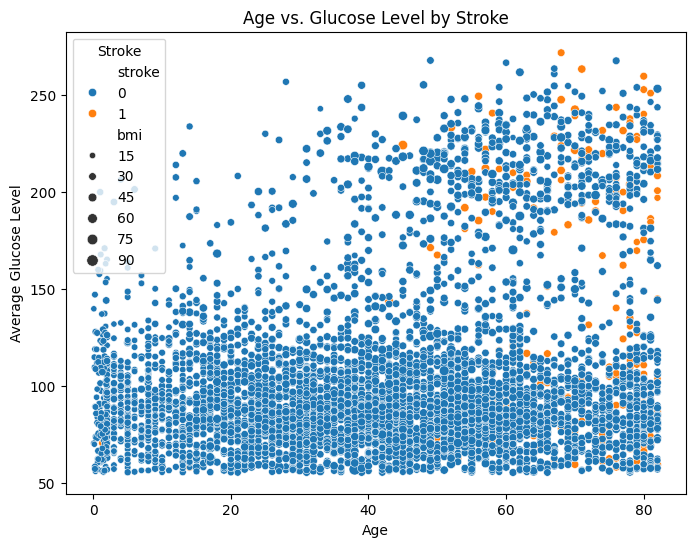

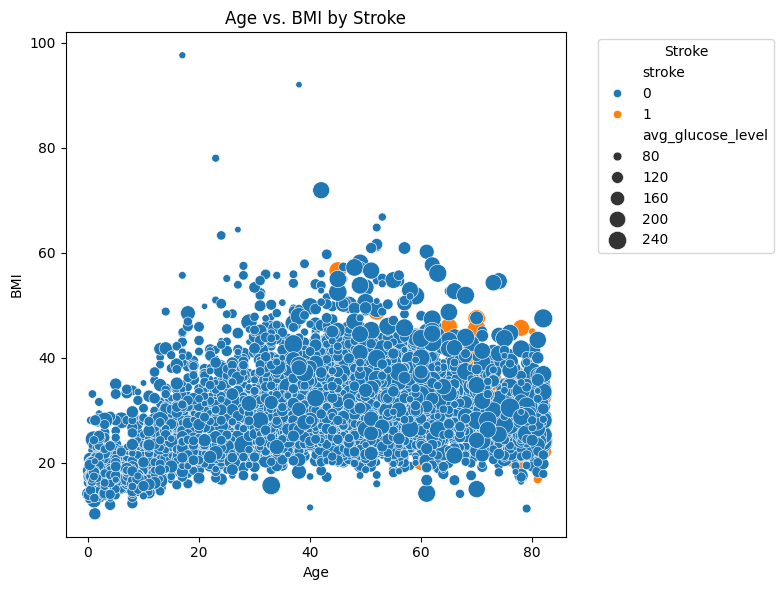

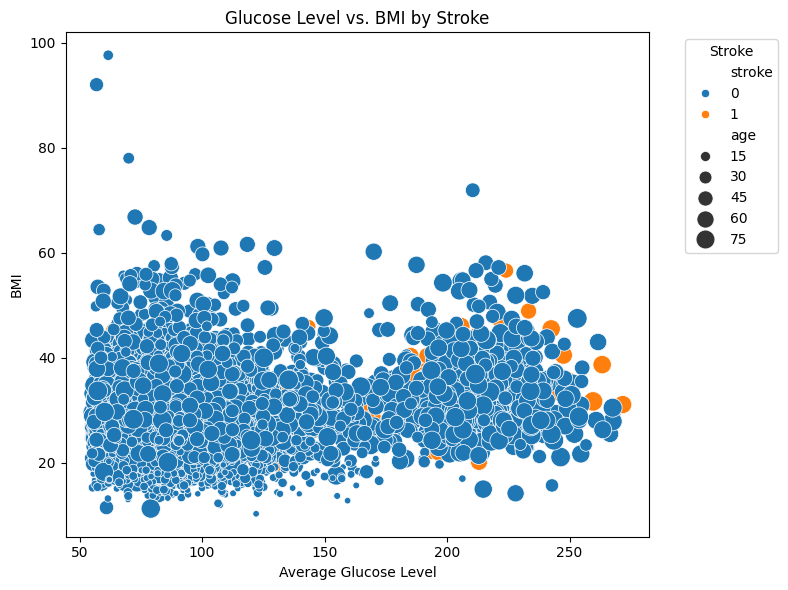

In [ ]:
# Visualize relationships between key features.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', size='bmi', data=data_viz)
plt.title('Age vs. Glucose Level by Stroke')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(title='Stroke')
plt.show()
# age vs bmi, hue = stroke, size = avg_glucose_level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', hue='stroke', size='avg_glucose_level', data=data_viz, sizes=(20, 200))
plt.title('Age vs. BMI by Stroke')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Stroke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#avg_glucose_level vs bmi, hue = stroke, size = age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', size='age', data=data_viz, sizes=(20, 200))
plt.title('Glucose Level vs. BMI by Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.legend(title='Stroke', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

 #  3. Data Cleaning and Preprocessing
# Handle missing values, outliers, and categorical variables. Apply feature scaling for numerical features.

#3.1 Handling missing values and imputing them


In [ ]:
# Replace 'N/A' with NaN in 'bmi'
data['bmi'] = data['bmi'].replace('N/A', np.nan).astype(float)

# Impute missing 'bmi' with median within age groups
def impute_bmi_by_age(group):
    group['bmi'] = group['bmi'].fillna(group['bmi'].median())
    return group

data = data.groupby(pd.cut(data['age'], bins=[0, 18, 40, 60, 100])).apply(impute_bmi_by_age)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


#3.2 Handling outliers and imputing them

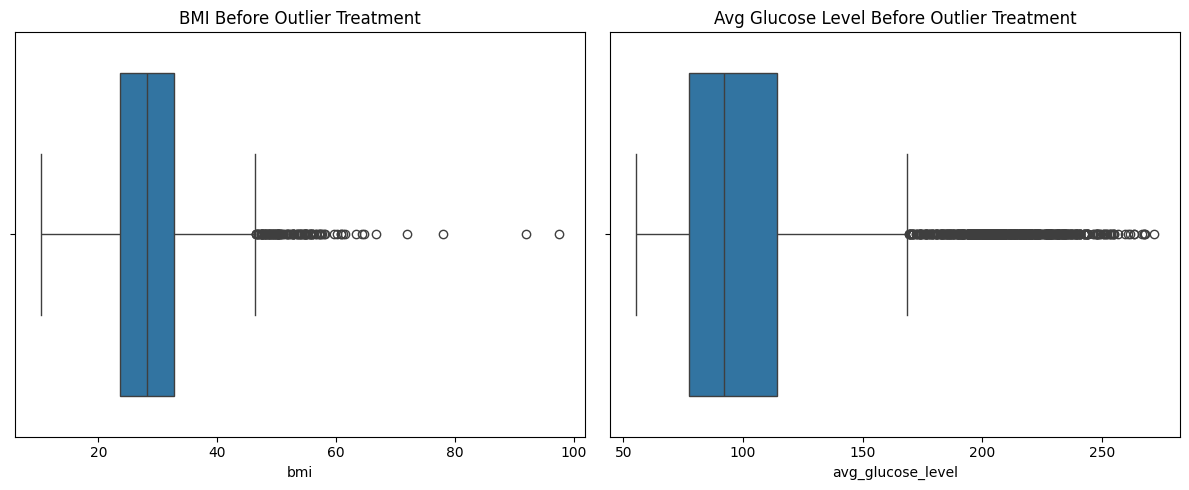

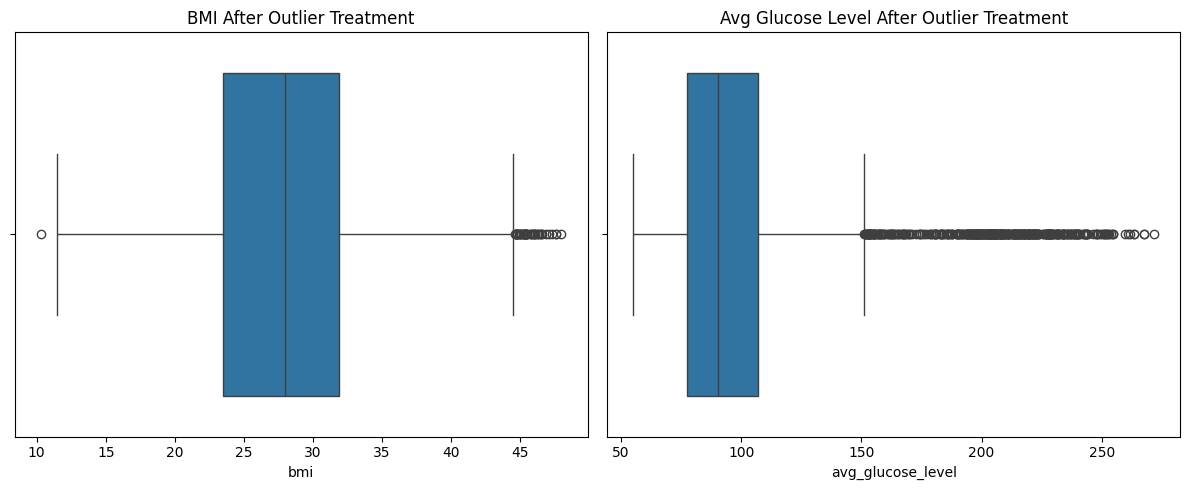

In [ ]:
# 1. Boxplots BEFORE outlier treatment
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['bmi'])
plt.title('BMI Before Outlier Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['avg_glucose_level'])
plt.title('Avg Glucose Level Before Outlier Treatment')
plt.tight_layout()
plt.show()

# 2. Impute outliers with median within age groups
def impute_outliers_by_age_group(df, column):
    # Define age bins
    bins = [0, 18, 40, 60, 100]
    labels = ['0-18', '19-40', '41-60', '61-100']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

    # For each group, find IQR and replace outliers with group median
    for group in df['age_group'].unique():
        group_mask = df['age_group'] == group
        Q1 = df.loc[group_mask, column].quantile(0.25)
        Q3 = df.loc[group_mask, column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = df.loc[group_mask, column].median()

        # Replace outliers with median
        df.loc[group_mask & ((df[column] < lower) | (df[column] > upper)), column] = median

    df.drop(columns=['age_group'], inplace=True)  # Clean up
    return df

# Apply to both columns
data = impute_outliers_by_age_group(data, 'bmi')
data = impute_outliers_by_age_group(data, 'avg_glucose_level')

# 3. Boxplots AFTER outlier treatment
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['bmi'])
plt.title('BMI After Outlier Treatment')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['avg_glucose_level'])
plt.title('Avg Glucose Level After Outlier Treatment')
plt.tight_layout()
plt.show()

#3.3 Data Encoding

In [ ]:
# One-hot encoding for categorical variables
one_hot_cols = ['ever_married', 'work_type', 'Residence_type', 'smoking_status']
data = pd.get_dummies(data, columns=one_hot_cols, drop_first=False)

#label encoding to gender

# we Dropped row where gender is 'Other' as it's only one tuple so considered noise
data = data[data['gender'].isin(['Male', 'Female'])]

# apply label encoding and give female weight 1 as females have higher frewuency with stroke
gender_map = {'Female': 1, 'Male': 0}
data['gender'] = data['gender'].map(gender_map)

#3.4 Feature scaling for numerical features

In [ ]:
# Feature scaling for numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# 3.5. Dimensionality Reduction
# Apply PCA, LDA, and t-SNE to visualize patient distributions.

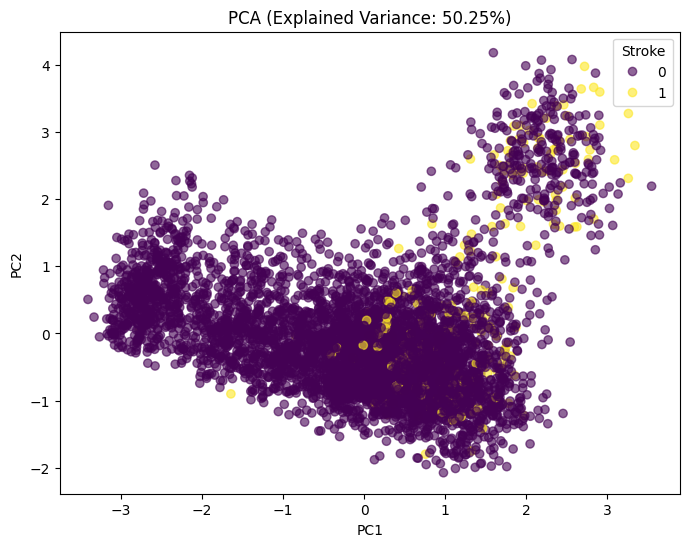

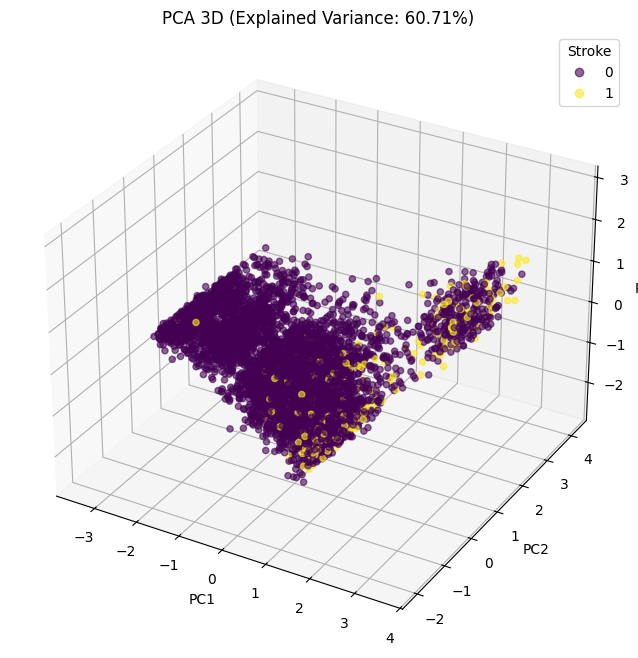

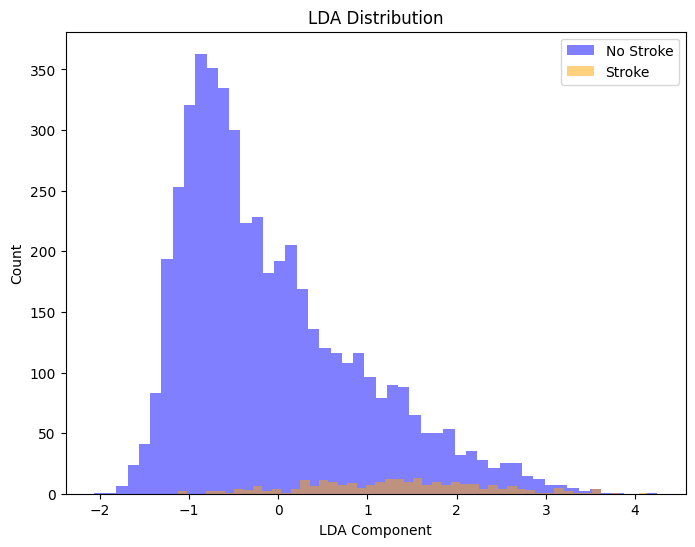

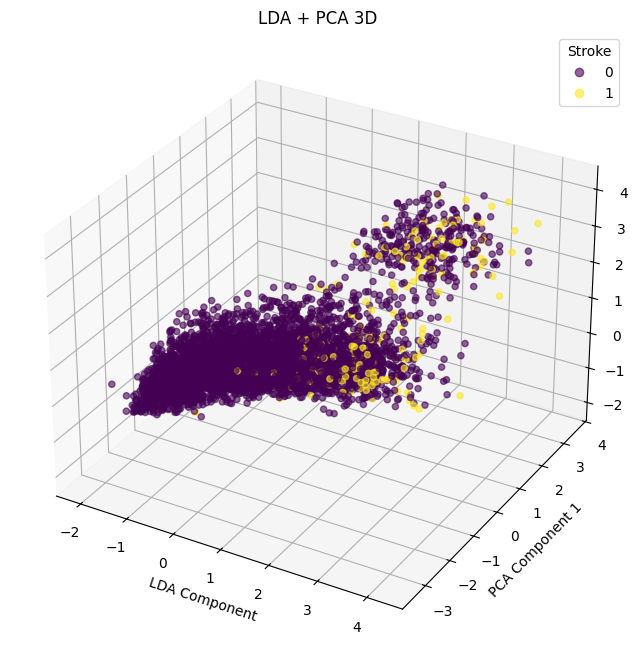

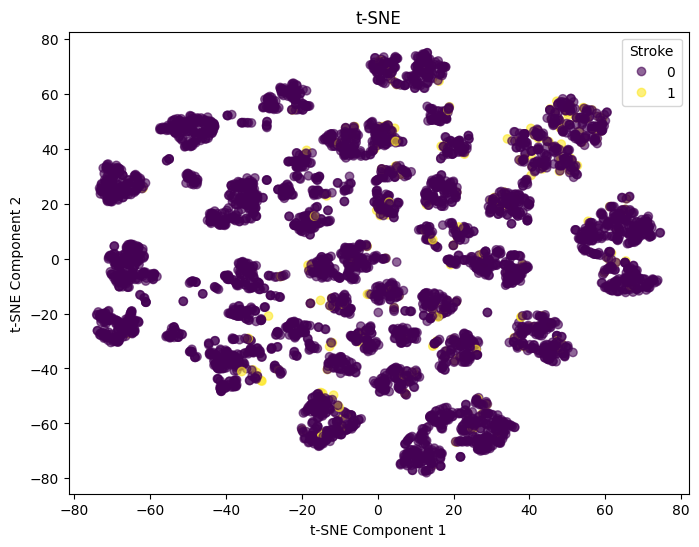

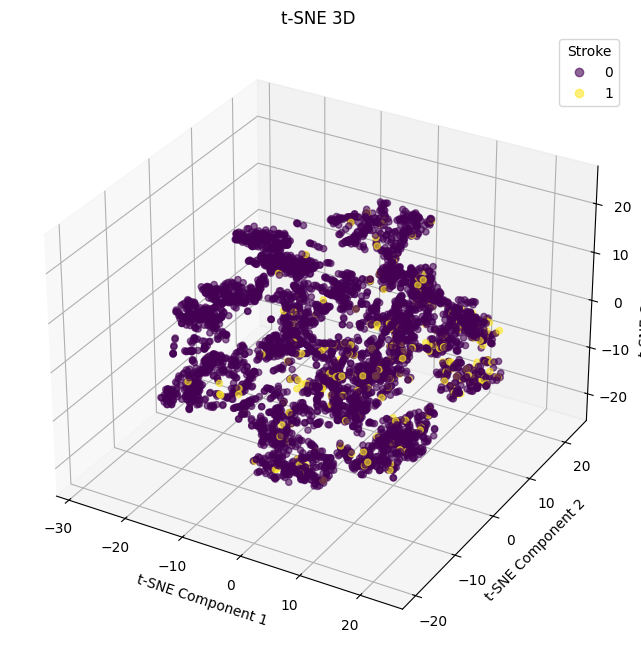

In [ ]:
# Split the data into features and target
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title(f'PCA (Explained Variance: {explained_variance.sum():.2%})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title='Stroke')
plt.show()

# PCA 3D
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(X)
explained_variance_3d = pca_3d.explained_variance_ratio_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d_result[:, 0], pca_3d_result[:, 1], pca_3d_result[:, 2], c=y, cmap='viridis', alpha=0.6)
ax.set_title(f'PCA 3D (Explained Variance: {sum(explained_variance_3d):.2%})')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title='Stroke')
plt.show()

# LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda_result = lda.fit_transform(X, y)

plt.figure(figsize=(8, 6))
plt.hist(lda_result[y == 0], bins=50, alpha=0.5, label='No Stroke', color='blue')
plt.hist(lda_result[y == 1], bins=50, alpha=0.5, label='Stroke', color='orange')
plt.title('LDA Distribution')
plt.xlabel('LDA Component')
plt.ylabel('Count')
plt.legend()
plt.show()

# LDA combined with PCA for 3D visualization
pca_lda = PCA(n_components=2)
pca_lda_result = pca_lda.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten lda_result to 1D
lda_result_flat = lda_result.flatten()

scatter = ax.scatter(lda_result_flat, pca_lda_result[:, 0], pca_lda_result[:, 1], c=y, cmap='viridis', alpha=0.6) # Use flattened lda_result
ax.set_title('LDA + PCA 3D')
ax.set_xlabel('LDA Component')
ax.set_ylabel('PCA Component 1')
ax.set_zlabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title='Stroke')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Stroke')
plt.show()

# t-SNE 3D
tsne_3d = TSNE(n_components=3, random_state=42)
tsne_3d_result = tsne_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_3d_result[:, 0], tsne_3d_result[:, 1], tsne_3d_result[:, 2], c=y, cmap='viridis', alpha=0.6)
ax.set_title('t-SNE 3D')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.legend(*scatter.legend_elements(), title='Stroke')
plt.show()


#Better PCA ,LDA,TSNE

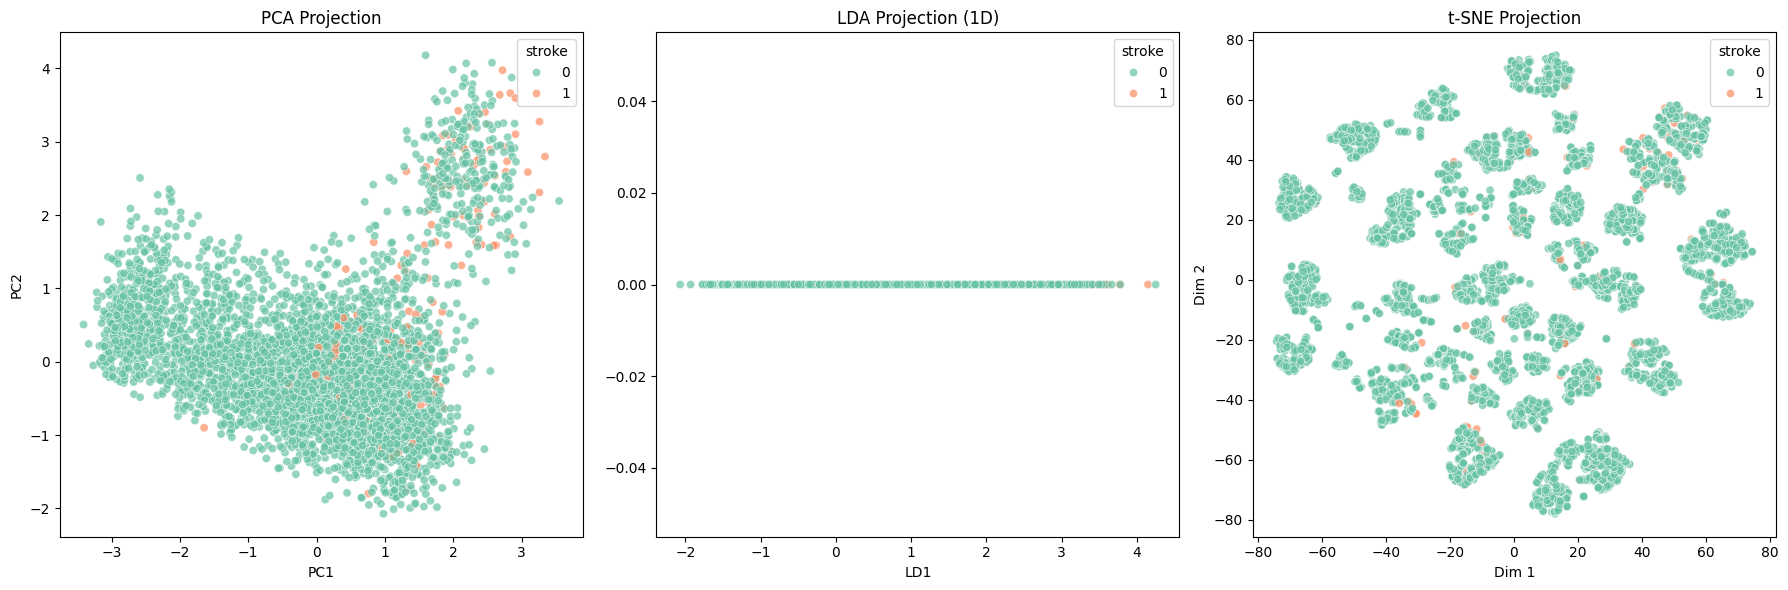

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#lda
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', ax=axs[0], alpha=0.7)
axs[0].set_title('PCA Projection')
axs[0].set_xlabel('PC1')
axs[0].set_ylabel('PC2')

# LDA plot
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette='Set2', ax=axs[1], alpha=0.7)
axs[1].set_title('LDA Projection (1D)')
axs[1].set_xlabel('LD1')
axs[1].set_ylabel('')


# t-SNE plot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set2', ax=axs[2], alpha=0.7)
axs[2].set_title('t-SNE Projection')
axs[2].set_xlabel('Dim 1')
axs[2].set_ylabel('Dim 2')

plt.tight_layout()
plt.show()


LDA 1D Projection visualized in 2D

<Axes: xlabel='LD1', ylabel='LD2'>

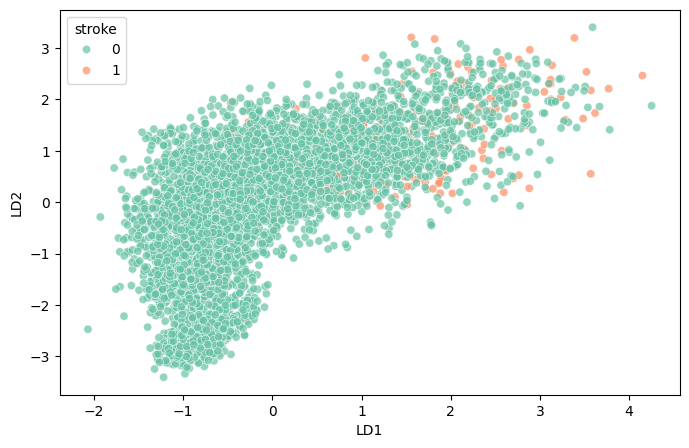

In [ ]:
# using orthogonal components to visualize the lda in 2D

lda_direction = lda.coef_[0]
lda_direction = lda_direction / np.linalg.norm(lda_direction)

X_orthogonal = X - np.outer(X_lda.flatten(), lda_direction)

pca_orthogonal = PCA(n_components=1)
X_lda_2d = pca_orthogonal.fit_transform(X_orthogonal)

X_lda_2d = np.column_stack((X_lda, X_lda_2d))

# Create LDA DataFrame for visualization
lda_df = pd.DataFrame(data=X_lda_2d, columns=['LD1', 'LD2'])
lda_df['stroke'] = data['stroke'].reset_index(drop=True)
plt.figure(figsize=(8, 5))

sns.scatterplot(x='LD1', y='LD2', hue='stroke', data=lda_df, palette='Set2', alpha=0.7)

LDA 1D

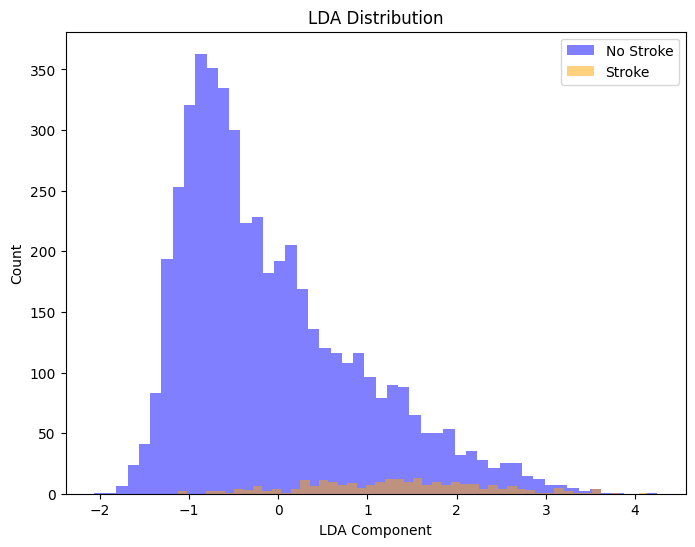

In [ ]:
# LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda_result = lda.fit_transform(X, y)

plt.figure(figsize=(8, 6))
plt.hist(lda_result[y == 0], bins=50, alpha=0.5, label='No Stroke', color='blue')
plt.hist(lda_result[y == 1], bins=50, alpha=0.5, label='Stroke', color='orange')
plt.title('LDA Distribution')
plt.xlabel('LDA Component')
plt.ylabel('Count')
plt.legend()
plt.show()

PCA 3D

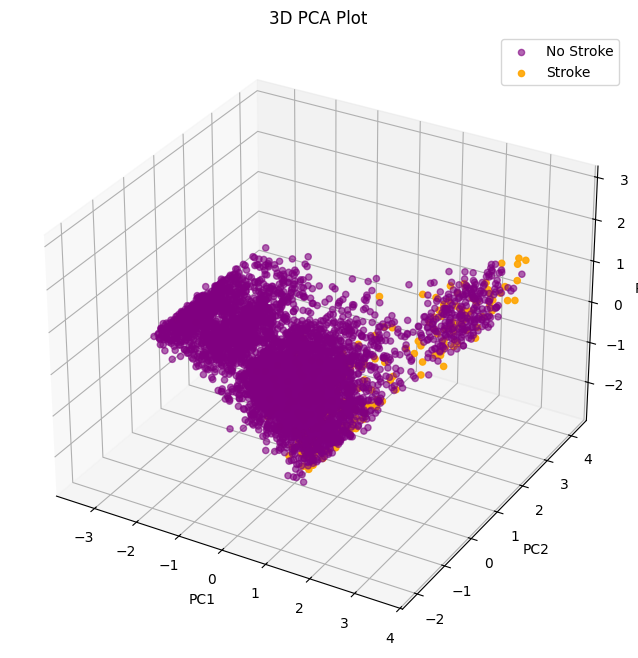

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3d[y == 0, 0], X_pca_3d[y == 0, 1], X_pca_3d[y == 0, 2], label='No Stroke', alpha=0.6, c='purple')
ax.scatter(X_pca_3d[y == 1, 0], X_pca_3d[y == 1, 1], X_pca_3d[y == 1, 2], label='Stroke', alpha=0.9, c='orange')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot')
ax.legend()
plt.show()

TSNE 3D

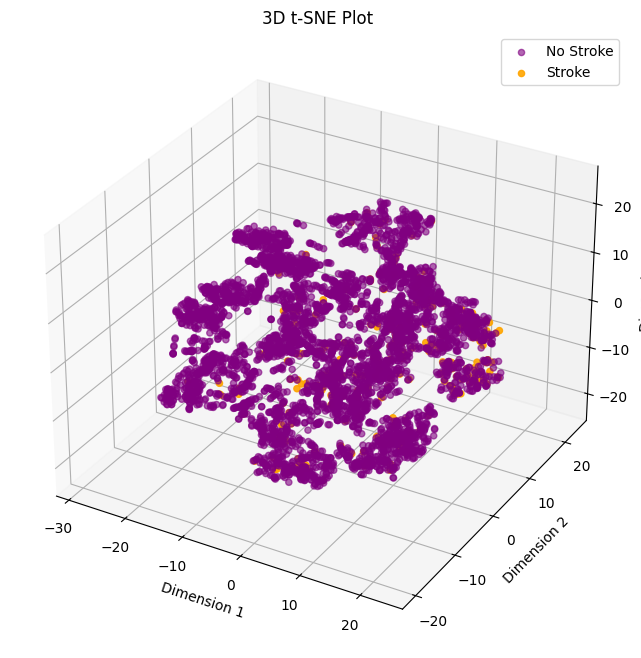

In [ ]:
# t-SNE with 3 components
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each class
ax.scatter(X_tsne_3d[y == 0, 0], X_tsne_3d[y == 0, 1], X_tsne_3d[y == 0, 2], label='No Stroke', alpha=0.6, c='purple')
ax.scatter(X_tsne_3d[y == 1, 0], X_tsne_3d[y == 1, 1], X_tsne_3d[y == 1, 2], label='Stroke', alpha=0.9, c='orange')

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D t-SNE Plot')
ax.legend()

# Display the plot
plt.show()

#3.6 Data Splitting

In [ ]:
# Split into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Apply SMOTE to handle class imbalance and apply it on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# 4.Classifiers
# Train Naïve Bayes,SVM,KNN,Decision Trees and evluate and test each one



# 4.1. Naïve Bayes

In [ ]:
# Tune the var_smoothing parameter.
nb_param_grid = {'var_smoothing': np.logspace(0, -9, num=10)}
nb_grid = GridSearchCV(GaussianNB(), nb_param_grid, cv=5, scoring='f1')
nb_grid.fit(X_train_smote, y_train_smote)

# Best Naïve Bayes model
nb_best = nb_grid.best_estimator_
print(f"Best Naïve Bayes Parameters: {nb_grid.best_params_}")

# Predict on validation set
y_val_pred_nb = nb_best.predict(X_val)

Best Naïve Bayes Parameters: {'var_smoothing': np.float64(1.0)}


Plot validation scores for different hyperparameter configurations.

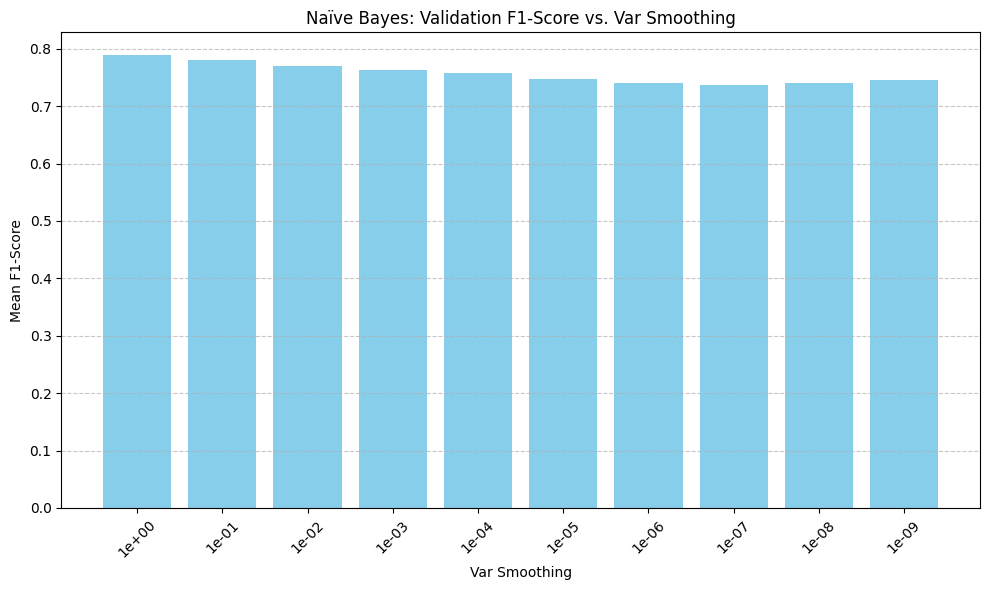

In [ ]:
nb_scores = nb_grid.cv_results_['mean_test_score']
nb_params = [f"{v:.0e}" for v in nb_param_grid['var_smoothing']]  # scientific notation

# Plot as bar chart
plt.figure(figsize=(10, 6))
plt.bar(nb_params, nb_scores, color='skyblue')
plt.title('Naïve Bayes: Validation F1-Score vs. Var Smoothing')
plt.xlabel('Var Smoothing')
plt.ylabel('Mean F1-Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tesing and Evaluate Naïve Bayes

Naïve Bayes Test Metrics:
Accuracy: 0.6402
Precision: 0.1161
Recall: 0.9474
F1-Score: 0.2069

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77       729
           1       0.12      0.95      0.21        38

    accuracy                           0.64       767
   macro avg       0.56      0.79      0.49       767
weighted avg       0.95      0.64      0.74       767



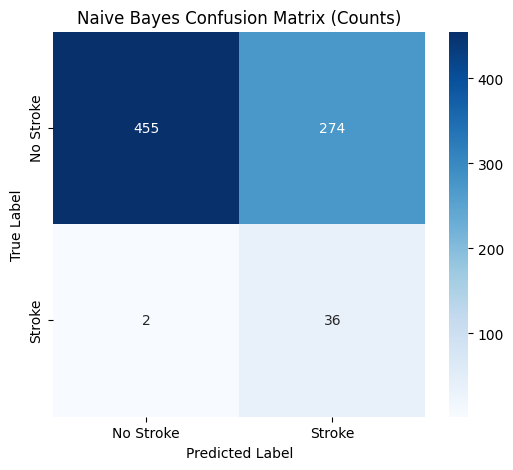

In [ ]:
y_test_pred_nb = nb_best.predict(X_test)

# Metrics
nb_accuracy = accuracy_score(y_test, y_test_pred_nb)
nb_precision = precision_score(y_test, y_test_pred_nb)
nb_recall = recall_score(y_test, y_test_pred_nb)
nb_f1 = f1_score(y_test, y_test_pred_nb)

print("Naïve Bayes Test Metrics:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1-Score: {nb_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_nb))

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_test_pred_nb)

# Define class labels
labels = ['No Stroke', 'Stroke']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Naive Bayes Confusion Matrix (Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#4.2. Support Vector Machine (SVM)

In [ ]:
# Tune kernel and regularization parameters.
svm_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='f1')
svm_grid.fit(X_train_smote, y_train_smote)

# Best SVM model
svm_best = svm_grid.best_estimator_
print(f"Best SVM Parameters: {svm_grid.best_params_}")

# Predict on validation set
y_val_pred_svm = svm_best.predict(X_val)

Best SVM Parameters: {'C': 10, 'kernel': 'rbf'}


Plot validation scores for different hyperparameter configurations.

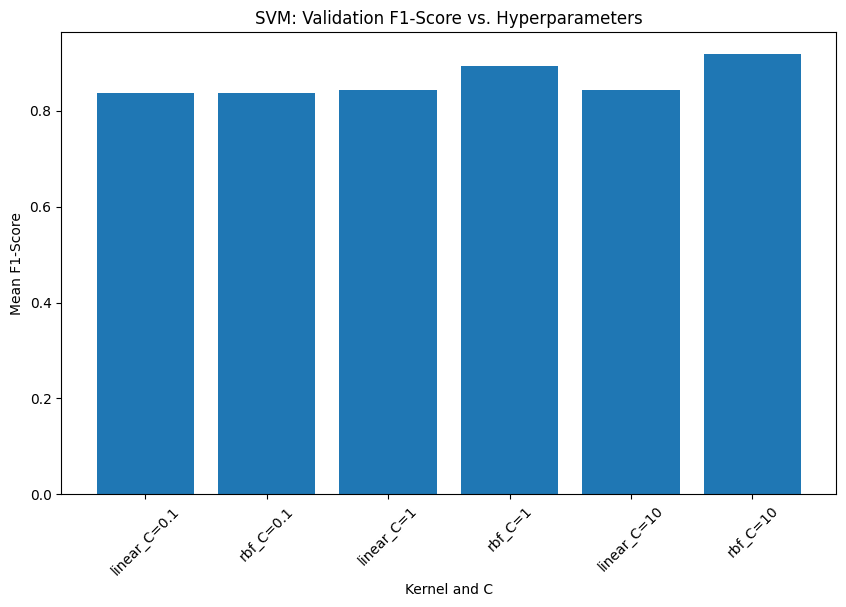

In [ ]:
# SVM
svm_scores = svm_grid.cv_results_['mean_test_score']
svm_params = [f"{p['kernel']}_C={p['C']}" for p in svm_grid.cv_results_['params']]
plt.figure(figsize=(10, 6))
plt.bar(svm_params, svm_scores)
plt.title('SVM: Validation F1-Score vs. Hyperparameters')
plt.xlabel('Kernel and C')
plt.ylabel('Mean F1-Score')
plt.xticks(rotation=45)
plt.show()

Evaluating and Testing SVM

SVM Test Metrics:
Accuracy: 0.8357
Precision: 0.0510
Recall: 0.1316
F1-Score: 0.0735

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       729
           1       0.05      0.13      0.07        38

    accuracy                           0.84       767
   macro avg       0.50      0.50      0.49       767
weighted avg       0.91      0.84      0.87       767



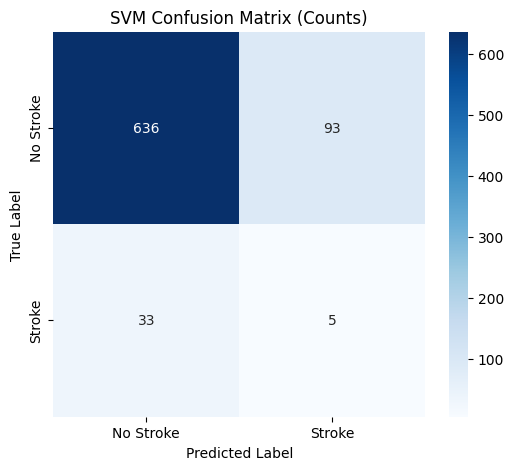

In [ ]:
# ### 5.2. SVM Evaluation
y_test_pred_svm = svm_best.predict(X_test)

# Metrics
svm_accuracy = accuracy_score(y_test, y_test_pred_svm)
svm_precision = precision_score(y_test, y_test_pred_svm)
svm_recall = recall_score(y_test, y_test_pred_svm)
svm_f1 = f1_score(y_test, y_test_pred_svm)

print("SVM Test Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1-Score: {svm_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_svm))

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Define class labels
labels = ['No Stroke', 'Stroke']

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('SVM Confusion Matrix (Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#4.3 K-Nearest Neighbors (KNN)

In [ ]:
# Tune the number of neighbors and distance metric.
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1')
knn_grid.fit(X_train_smote, y_train_smote)

# Best KNN model
knn_best = knn_grid.best_estimator_
print(f"Best KNN Parameters: {knn_grid.best_params_}")

# Predict on validation set
y_val_pred_knn = knn_best.predict(X_val)


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Plot validation scores for different hyperparameter configurations.

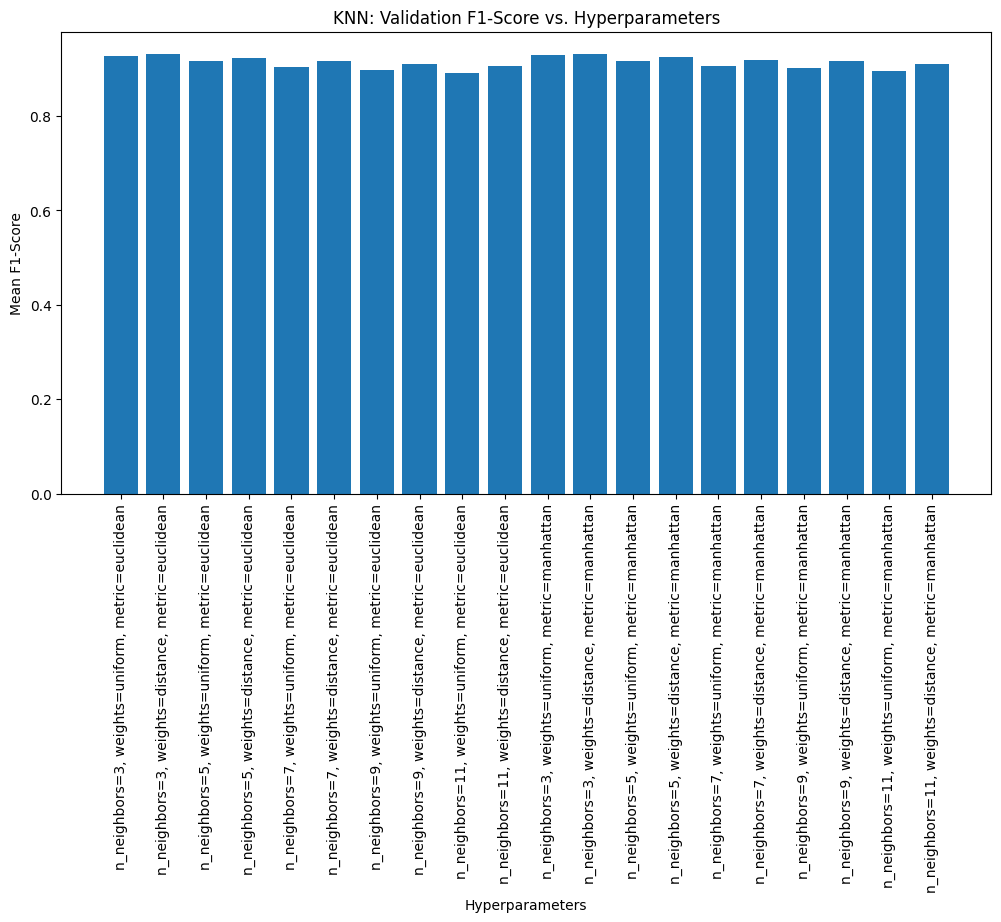

In [ ]:
# KNN
knn_scores = knn_grid.cv_results_['mean_test_score']
knn_params = [f"n_neighbors={p['n_neighbors']}, weights={p['weights']}, metric={p['metric']}" for p in knn_grid.cv_results_['params']]
plt.figure(figsize=(12, 6))
plt.bar(knn_params, knn_scores)
plt.title('KNN: Validation F1-Score vs. Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean F1-Score')
plt.xticks(rotation=90)
plt.show()


Evaluating and Testing KNN

KNN Test Metrics:
Accuracy: 0.8357
Precision: 0.0686
Recall: 0.1842
F1-Score: 0.1000

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       729
           1       0.07      0.18      0.10        38

    accuracy                           0.84       767
   macro avg       0.51      0.53      0.50       767
weighted avg       0.91      0.84      0.87       767



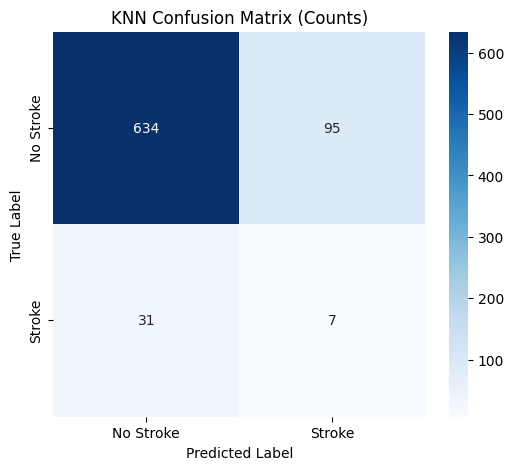

In [ ]:
# Metrics
y_test_pred_knn = knn_best.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_test_pred_knn)
knn_precision = precision_score(y_test, y_test_pred_knn)
knn_recall = recall_score(y_test, y_test_pred_knn)
knn_f1 = f1_score(y_test, y_test_pred_knn)

print("KNN Test Metrics:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_knn))

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_test_pred_knn)

# Define class labels
labels = ['No Stroke', 'Stroke']

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('KNN Confusion Matrix (Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#4.4 Decision Trees

In [ ]:
# Tune the maximum depth and minimum samples per split.
dt_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5, scoring='f1')
dt_grid.fit(X_train_smote, y_train_smote)

# Best Decision Tree model
dt_best = dt_grid.best_estimator_
print(f"Best Decision Tree Parameters: {dt_grid.best_params_}")

# Predict on validation set
y_val_pred_dt = dt_best.predict(X_val)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


Plot validation scores for different hyperparameter configurations

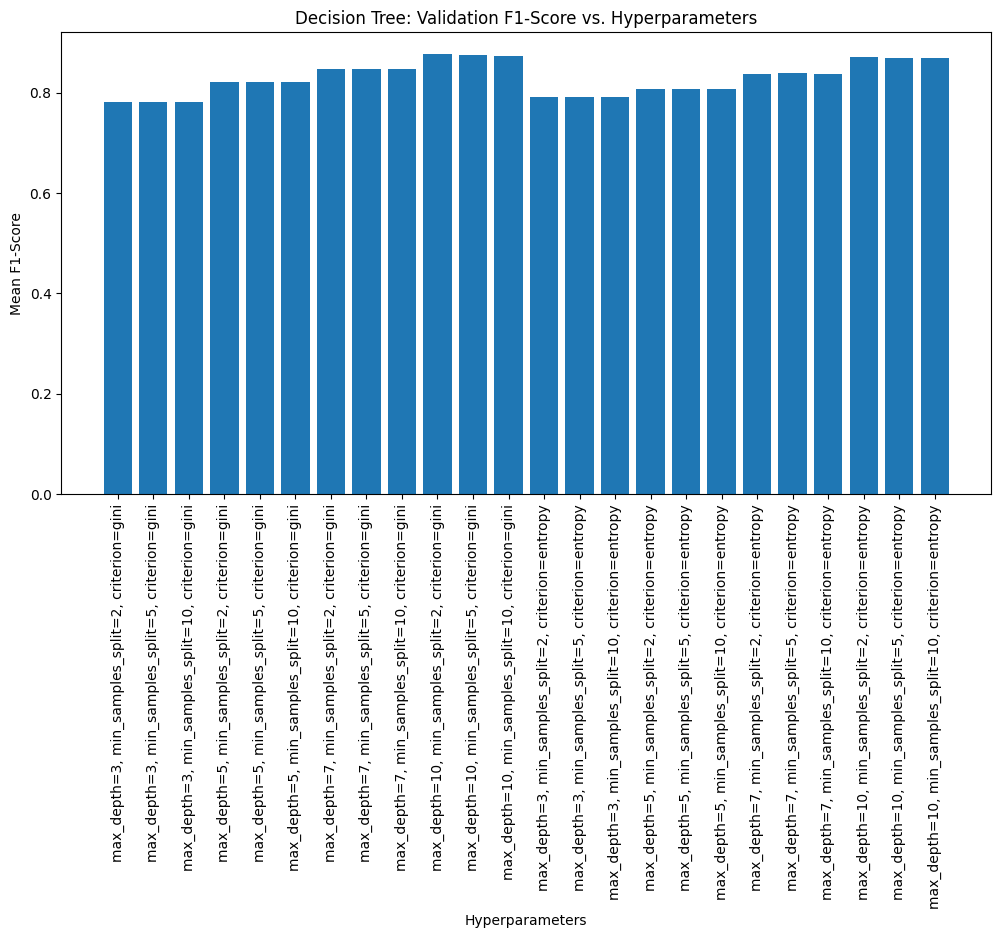

In [ ]:
# Decision Tree
dt_scores = dt_grid.cv_results_['mean_test_score']
dt_params = [f"max_depth={p['max_depth']}, min_samples_split={p['min_samples_split']}, criterion={p['criterion']}" for p in dt_grid.cv_results_['params']]
plt.figure(figsize=(12, 6))
plt.bar(dt_params, dt_scores)
plt.title('Decision Tree: Validation F1-Score vs. Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Mean F1-Score')
plt.xticks(rotation=90)
plt.show()

Evaluating Decision Trees

Decision Tree Test Metrics:
Accuracy: 0.8044
Precision: 0.1267
Recall: 0.5000
F1-Score: 0.2021

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       729
           1       0.13      0.50      0.20        38

    accuracy                           0.80       767
   macro avg       0.55      0.66      0.55       767
weighted avg       0.93      0.80      0.85       767



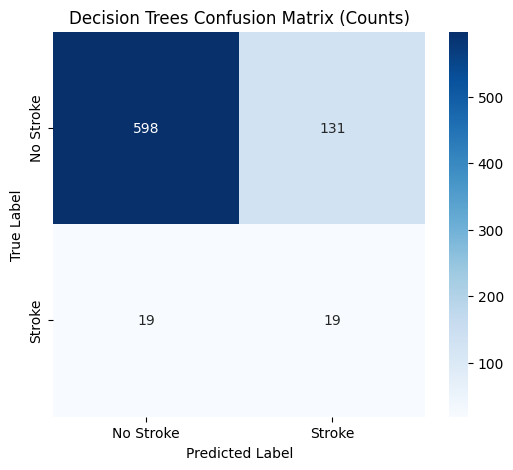

In [ ]:
y_test_pred_dt = dt_best.predict(X_test)

# Metrics
dt_accuracy = accuracy_score(y_test, y_test_pred_dt)
dt_precision = precision_score(y_test, y_test_pred_dt)
dt_recall = recall_score(y_test, y_test_pred_dt)
dt_f1 = f1_score(y_test, y_test_pred_dt)

print("Decision Tree Test Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

# Define class labels
labels = ['No Stroke', 'Stroke']

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.title('Decision Trees Confusion Matrix (Counts)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#5 Performance Comparison between all the classifiers

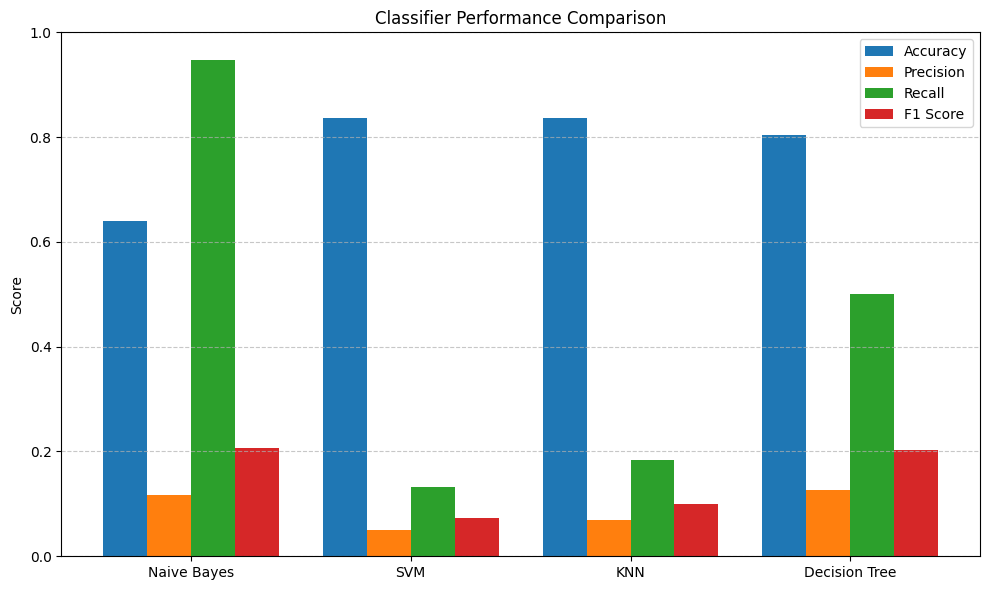

In [ ]:
# Example metric values (replace with your actual computed scores)
classifiers = ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree']

accuracy = [nb_accuracy, svm_accuracy, knn_accuracy, dt_accuracy]
precision = [nb_precision, svm_precision, knn_precision, dt_precision]
recall = [nb_recall, svm_recall, knn_recall, dt_recall]
f1 = [nb_f1, svm_f1, knn_f1, dt_f1]

# Bar chart setup
x = np.arange(len(classifiers))  # label locations
width = 0.2  # width of each bar

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

# Labels and formatting
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Classifier Performance Comparison')
plt.xticks(x, classifiers)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

After evaluating four classifiers — SVM, KNN, Naïve Bayes, and Decision Tree — across key performance metrics (accuracy, precision, recall, and F1-score), Naïve Bayes was selected as the best-performing classifier for this stroke prediction task as Naïve Bayes achieved the highest recall, meaning it correctly identified the largest proportion of actual stroke cases.
This is critical in medical applications, where false negatives (missed stroke predictions) could have life-threatening consequences.

#6.Clustering Analysis
Apply K-Means and Hierarchical Clustering to identify natural groupings of patients.

#6.1. K-Means Clustering

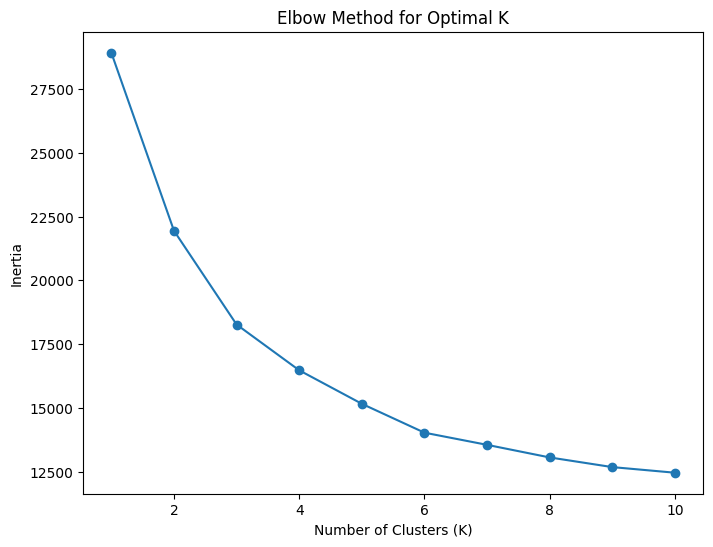

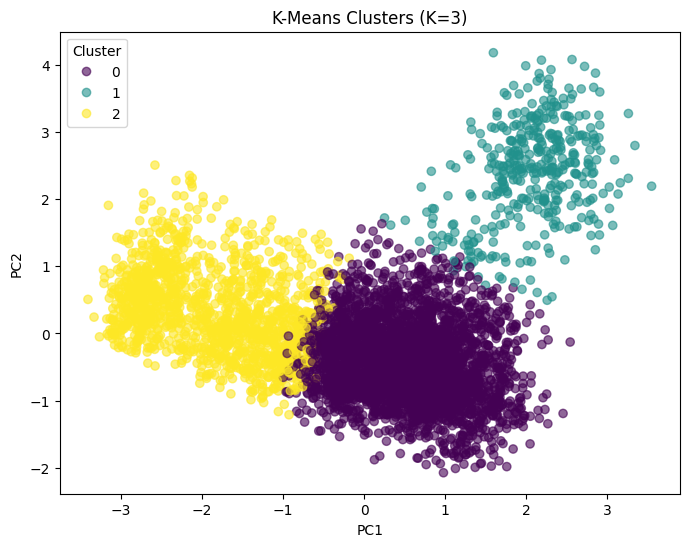

In [ ]:
from sklearn.cluster import KMeans
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_k = 3  # Example value, adjust based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataset
data['kmeans_cluster'] = kmeans_labels

# Visualize clusters using PCA
pca_kmeans = PCA(n_components=2)
pca_kmeans_result = pca_kmeans.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_kmeans_result[:, 0], pca_kmeans_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title(f'K-Means Clusters (K={optimal_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

#6.2 Hierarchical Clustering

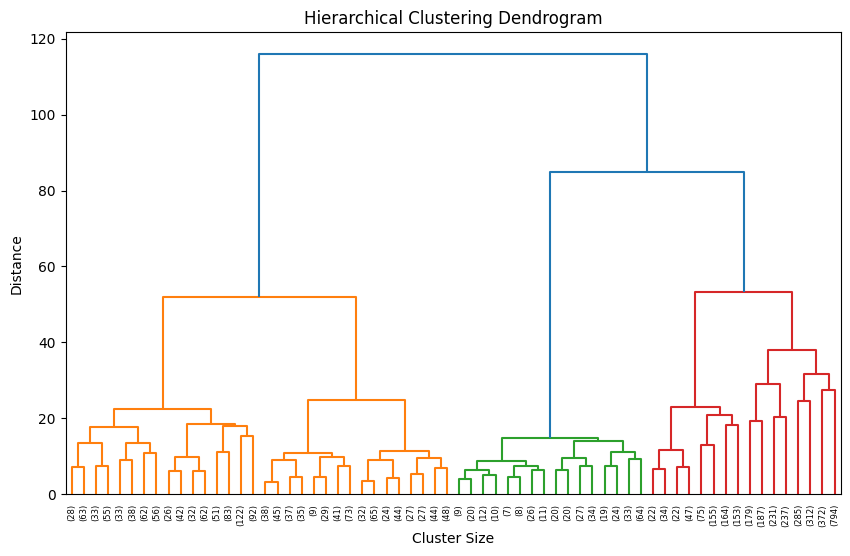

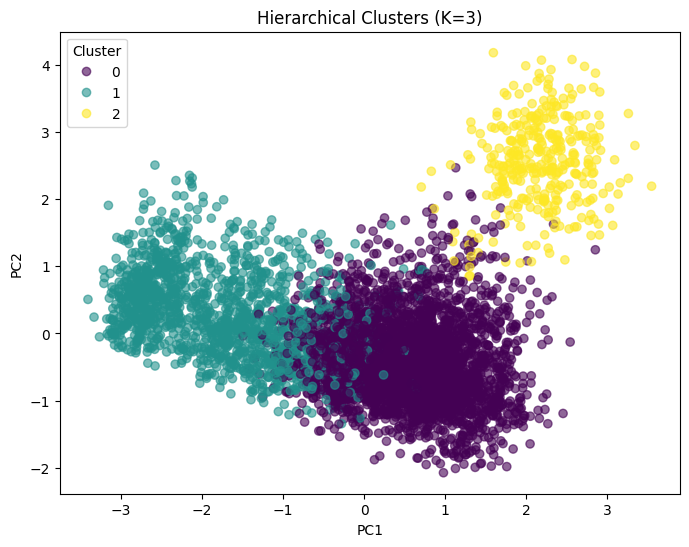

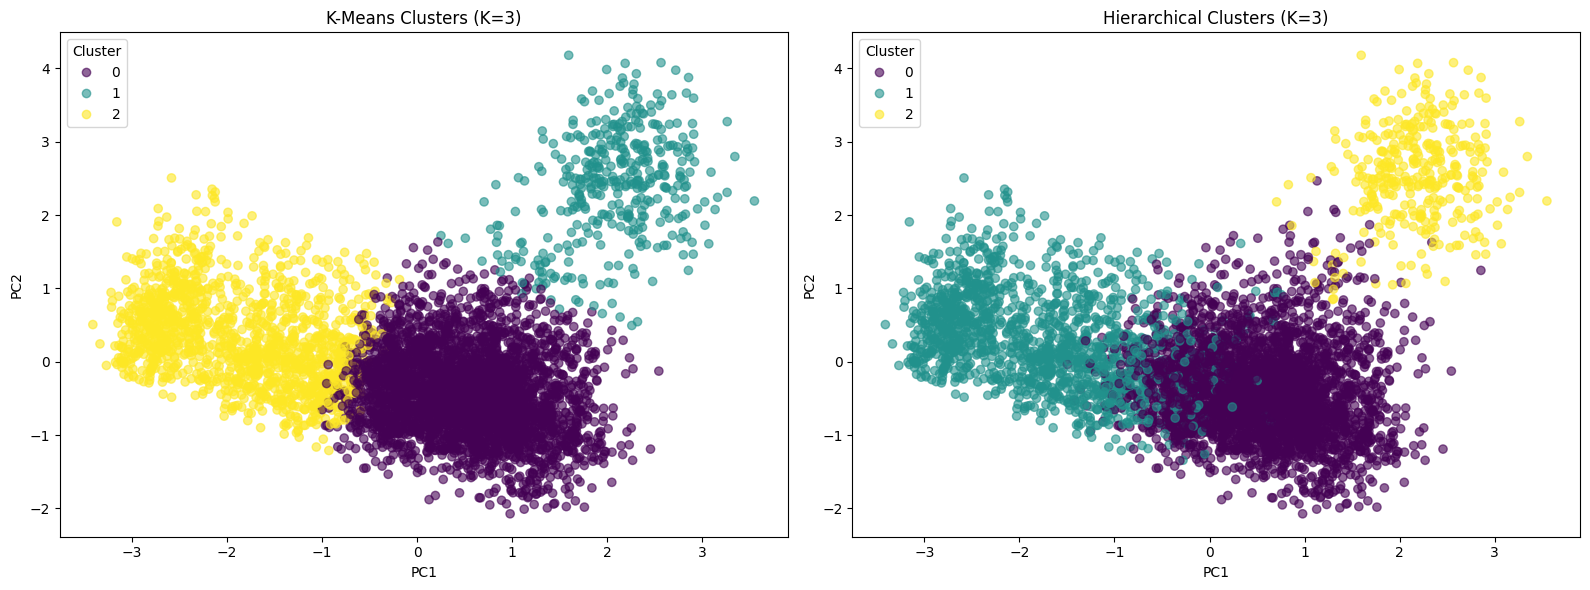

In [ ]:
# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering with the optimal number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(X)

# Add cluster labels to the dataset
data['hierarchical_cluster'] = hierarchical_labels

# Visualize clusters using PCA
pca_hierarchical = PCA(n_components=2)
pca_hierarchical_result = pca_hierarchical.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_hierarchical_result[:, 0], pca_hierarchical_result[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.6)
plt.title(f'Hierarchical Clusters (K={optimal_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# Visualize K-Means and Hierarchical Clustering side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means Clusters
scatter_kmeans = axes[0].scatter(pca_kmeans_result[:, 0], pca_kmeans_result[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[0].set_title(f'K-Means Clusters (K={optimal_k})')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(*scatter_kmeans.legend_elements(), title='Cluster')

# Hierarchical Clusters
scatter_hierarchical = axes[1].scatter(pca_hierarchical_result[:, 0], pca_hierarchical_result[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.6)
axes[1].set_title(f'Hierarchical Clusters (K={optimal_k})')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend(*scatter_hierarchical.legend_elements(), title='Cluster')

plt.tight_layout()
plt.show()

#7.Clustering Analysis Insights
# Compare clusters with stroke risk and identify high-risk groups.

In [ ]:
# K-Means cluster stroke statistics
kmeans_stats = data.groupby('kmeans_cluster')['stroke'].agg(['mean', 'count'])
print("K-Means Cluster Stroke Risk:")
print(kmeans_stats)

# Hierarchical cluster stroke statistics
hier_stats = data.groupby('hierarchical_cluster')['stroke'].agg(['mean', 'count'])
print("\nHierarchical Cluster Stroke Risk:")
print(hier_stats)

# Identify high-risk clusters
high_risk_kmeans = kmeans_stats['mean'].idxmax()
high_risk_hierarchical = hier_stats['mean'].idxmax()

print(f"\nHigh-Risk K-Means Cluster: {high_risk_kmeans}")
print(f"High-Risk Hierarchical Cluster: {high_risk_hierarchical}")

print(f"High-Risk Hierarchical Cluster: {high_risk_hierarchical}")


K-Means Cluster Stroke Risk:
                    mean  count
kmeans_cluster                 
0               0.052327   3287
1               0.185930    398
2               0.002107   1424

Hierarchical Cluster Stroke Risk:
                          mean  count
hierarchical_cluster                 
0                     0.053839   3269
1                     0.004679   1496
2                     0.191860    344

High-Risk K-Means Cluster: 1
High-Risk Hierarchical Cluster: 2
High-Risk Hierarchical Cluster: 2


#Comparing clustering with Naive Bayes classifier predictions

In [ ]:
# Add classifier predictions (e.g., Naive Bayes)
data['nb_pred'] = nb_best.predict(X)

# Stroke predictions from classifier
nb_stroke_pred = data[data['nb_pred'] == 1]

# Distribution of predicted strokes across K-Means clusters
print("\nK-Means Cluster Distribution of Predicted Stroke Cases:")
print(nb_stroke_pred['kmeans_cluster'].value_counts(normalize=True))

# Distribution across Hierarchical clusters
print("\nHierarchical Cluster Distribution of Predicted Stroke Cases:")
print(nb_stroke_pred['hierarchical_cluster'].value_counts(normalize=True))



K-Means Cluster Distribution of Predicted Stroke Cases:
kmeans_cluster
0    0.802677
1    0.197323
Name: proportion, dtype: float64

Hierarchical Cluster Distribution of Predicted Stroke Cases:
hierarchical_cluster
0    0.826971
2    0.170550
1    0.002479
Name: proportion, dtype: float64


#Plot Predicted Stroke Distribution Across Clusters

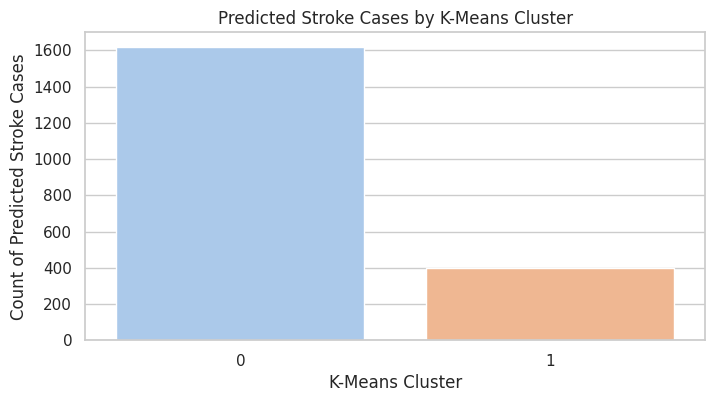

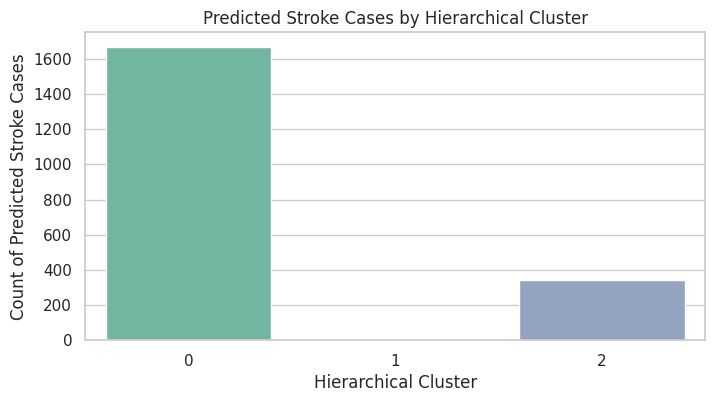

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# Plot distribution of predicted stroke cases by K-Means cluster
plt.figure(figsize=(8, 4))
sns.countplot(x='kmeans_cluster', data=nb_stroke_pred, palette='pastel')
plt.title('Predicted Stroke Cases by K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count of Predicted Stroke Cases')
plt.show()

# Plot distribution of predicted stroke cases by Hierarchical cluster
plt.figure(figsize=(8, 4))
sns.countplot(x='hierarchical_cluster', data=nb_stroke_pred, palette='Set2')
plt.title('Predicted Stroke Cases by Hierarchical Cluster')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Count of Predicted Stroke Cases')
plt.show()

#8. Conclusion
This project focused on predicting stroke risk using clinical and lifestyle data through a combination of supervised and unsupervised machine learning techniques. After extensive data exploration, cleaning, and feature preprocessing, four classifiers were trained: Naïve Bayes, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Decision Tree. Performance was evaluated based on accuracy, precision, recall, and F1-score.



Among these, Naïve Bayes achieved the highest recall, making it the most suitable model for this medical prediction task, where minimizing false negatives is critical. Early detection of stroke-prone patients can lead to timely intervention and potentially save lives, which makes recall a priority over overall accuracy.

Additionally, K-Means and Hierarchical Clustering were applied to uncover natural groupings of patients. Clusters with the highest stroke rates were identified and profiled. The analysis showed a strong alignment between high-risk clusters and classifier predictions, suggesting that both unsupervised and supervised approaches reinforce each other in identifying vulnerable patient groups.

In summary, the integration of predictive modeling with clustering-based risk profiling provided not only accurate stroke predictions but also valuable insights into the patterns of patients most at risk, making this approach highly relevant for real-world healthcare applications.

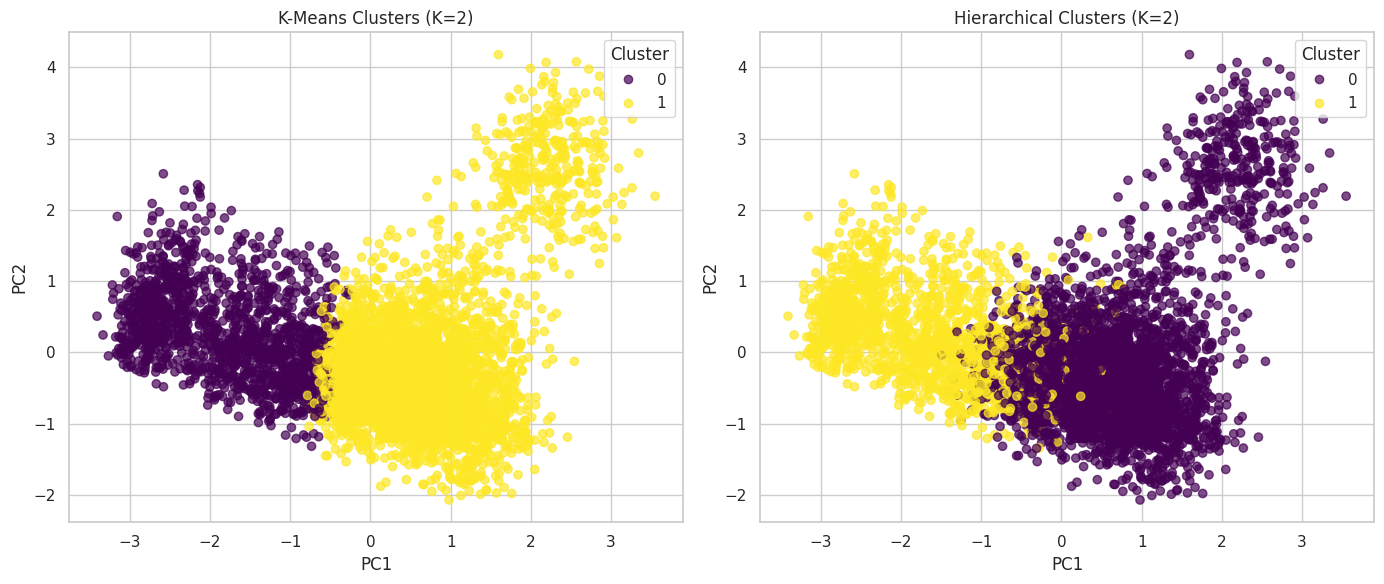

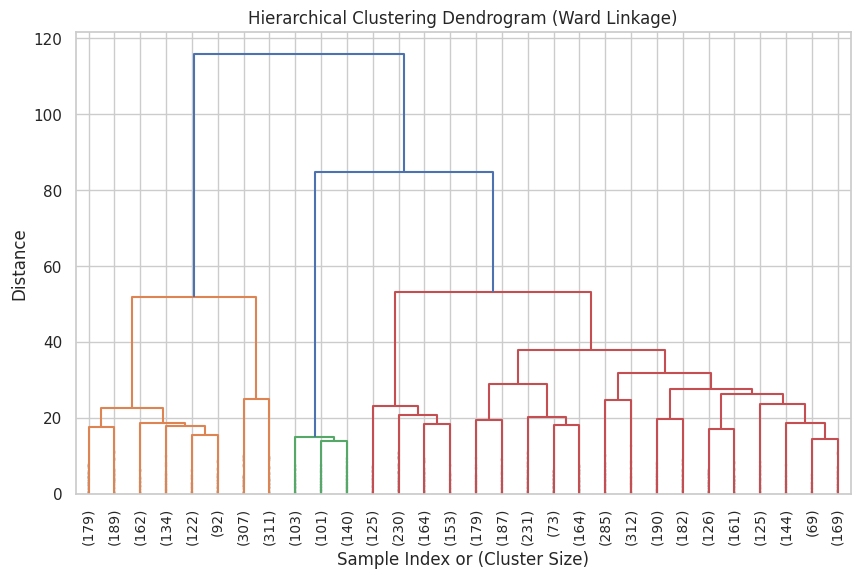

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

# --------- Clustering ---------

# K-Means clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2_labels = kmeans_2.fit_predict(X)

# Hierarchical clustering with 2 clusters
linked = linkage(X, method='ward')  # Optional for dendrogram, not required for clustering
hierarchical_2 = AgglomerativeClustering(n_clusters=2, linkage='ward')
hierarchical_2_labels = hierarchical_2.fit_predict(X)

# --------- Visualization ---------

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
scatter_k = axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_2_labels, cmap='viridis', alpha=0.7)
axes[0].set_title('K-Means Clusters (K=2)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].legend(*scatter_k.legend_elements(), title="Cluster")

# Hierarchical plot
scatter_h = axes[1].scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_2_labels, cmap='viridis', alpha=0.7)
axes[1].set_title('Hierarchical Clusters (K=2)')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].legend(*scatter_h.legend_elements(), title="Cluster")

plt.tight_layout()
plt.show()
